## MLOps Lifecycle Toolkit Chapter 2 Lab:
* [Writing Mathematical Code in LaTeX](#writing-math)
* [Installing Python Packages](#installing-packages)
* [Bayesian Logistic Regression Model](#bayesian-example)
* [Vectorizing functions](#vectorizing-functions)
* [Exploring Logistic Curve](#exploring-logistic-curve)
* [Logistic Classifier from Ground Up](#logistic-classifier)



## Rendering Mathematical Functions with MathJax <a class="anchor" id="writing-math"></a>


This Jupyter notebook renders Mathematical code in LaTeX using MathJax which works inside markdown or HTML. You can do the same in your own projects when writing equations in a notebook.




In [ ]:
!pip install mathjax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.display import HTML, Math
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
             "latest.js?config=default'></script>"))

def render(raw_equation: str):
  """
  Sets an equation in MathJax
  """
  raw_equation
  return Math(raw_equation)

render(r"""$$ \sum_{i}
\frac{X_{i}}{X_{i}-Y_{i}}
$$""")

<IPython.core.display.Math object>

# We can loop over an array in python like *so*

In [ ]:
import numpy as np 

# define a matrix of random Gaussian noise and loop over the rows and columns
noise_matrix = np.random.normal(0, 1, size=(5,5))
for row in noise_matrix:
  print(row)

for col in noise_matrix:
  print(col)

[-1.03304644  1.08735029 -0.05755073  1.68494736 -1.81612072]
[-0.27124423 -0.00247109 -0.06055287  0.55559414 -1.56288704]
[ 0.1593229   1.62562015 -0.53100132  0.81416024 -0.39437904]
[ 0.39411288 -0.53865335  0.08052461  0.87106714  1.63150011]
[ 0.16727163 -0.42162563  0.79572599 -0.92844582  0.2583044 ]
[-1.03304644  1.08735029 -0.05755073  1.68494736 -1.81612072]
[-0.27124423 -0.00247109 -0.06055287  0.55559414 -1.56288704]
[ 0.1593229   1.62562015 -0.53100132  0.81416024 -0.39437904]
[ 0.39411288 -0.53865335  0.08052461  0.87106714  1.63150011]
[ 0.16727163 -0.42162563  0.79572599 -0.92844582  0.2583044 ]


## Rendering Mathematical Functions with MathJax <a class="anchor" id="installing-packages"></a>

You need to pip install the following package. Read the following to learn about Python packages and installing Python packages from the official Python docs here:

[Installing Python Packages](https://packaging.python.org/en/latest/tutorials/installing-packages/)


### It is best practice to specific version but not lock into a specific minor since these can include critical security patches. PyPi 
packages can contain malicious code so you should use a tool like Snyk to check these packages for vulnerabilities before deploying packages to production.

In [ ]:
# this package is required to be installed before pymc is imported in Google Collab or you may get Theano errors.

!pip install arviz



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Bayesian Logistic Regression Model <a class="anchor" id="writing-math"></a>

We can use PyMC3 to estimate parameters of our logistic regression model and generate a trace plot on some sample clinical trial data.

We chose NUTS to generate the chain as it's a bit better than MCMC which can be slow to converge due to random walk.

In [ ]:

import pandas as pd 
import pymc as pm 

data = pd.DataFrame({"mdna3": [1, 2, 3], "mdna2": [1,2,3], "mdna1": [1,2,3], "trial_success": [1,0,1]})
print(data)
with pm.Model() as logistic_model:
    # choose priors 
    intercept = pm.Normal('intercept', 0, 1)
    beta_1 = pm.Normal('beta_1', 0, 100)
    beta_2 = pm.Normal('beta_2', 0, 100)
    beta_3 = pm.Normal('beta_3', 0, 100)

    likelihood = pm.invlogit(intercept + beta_1 * data.mdna1)

    # Bernoulli random vector with probability of success
    # given by sigmoid function and actual data as observed
    pm.Bernoulli(name='logit', p=likelihood, observed=data.trial_success)

   

   mdna3  mdna2  mdna1  trial_success
0      1      1      1              1
1      2      2      2              0
2      3      3      3              1


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'beta_1'}>,
        <AxesSubplot:title={'center':'beta_1'}>],
       [<AxesSubplot:title={'center':'beta_2'}>,
        <AxesSubplot:title={'center':'beta_2'}>],
       [<AxesSubplot:title={'center':'beta_3'}>,
        <AxesSubplot:title={'center':'beta_3'}>]], dtype=object)

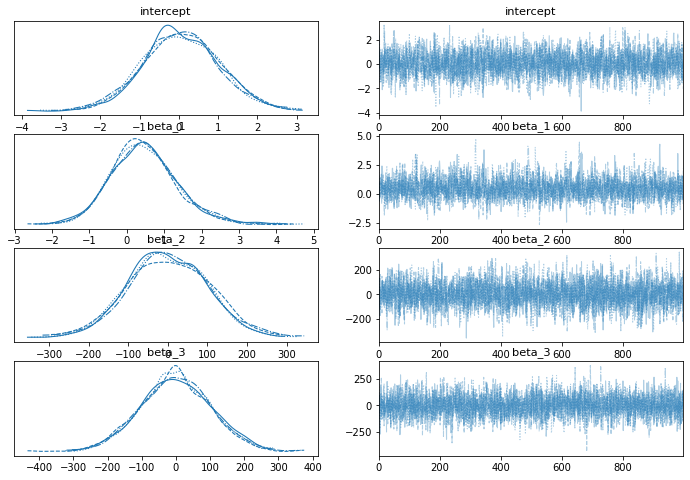

In [ ]:
with logistic_model:
    trace = pm.sample(tune=1000,
                         draws=1000,
                         chains=4,
                         init = 'adapt_diag'
    )
pm.plot_trace(trace)

In [ ]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,0.056,0.972,-1.724,1.955,0.018,0.014,2818.0,2703.0,1.0
beta_1,0.464,0.890,-1.112,2.242,0.019,0.015,2351.0,2203.0,1.0
beta_2,0.608,101.236,-180.447,197.865,1.667,1.490,3694.0,3083.0,1.0
beta_3,-0.409,102.102,-186.557,198.764,1.558,1.505,4293.0,3216.0,1.0


## We can generate a pair plot using the chain we generated by passing in the trace object to the plot_pair function.

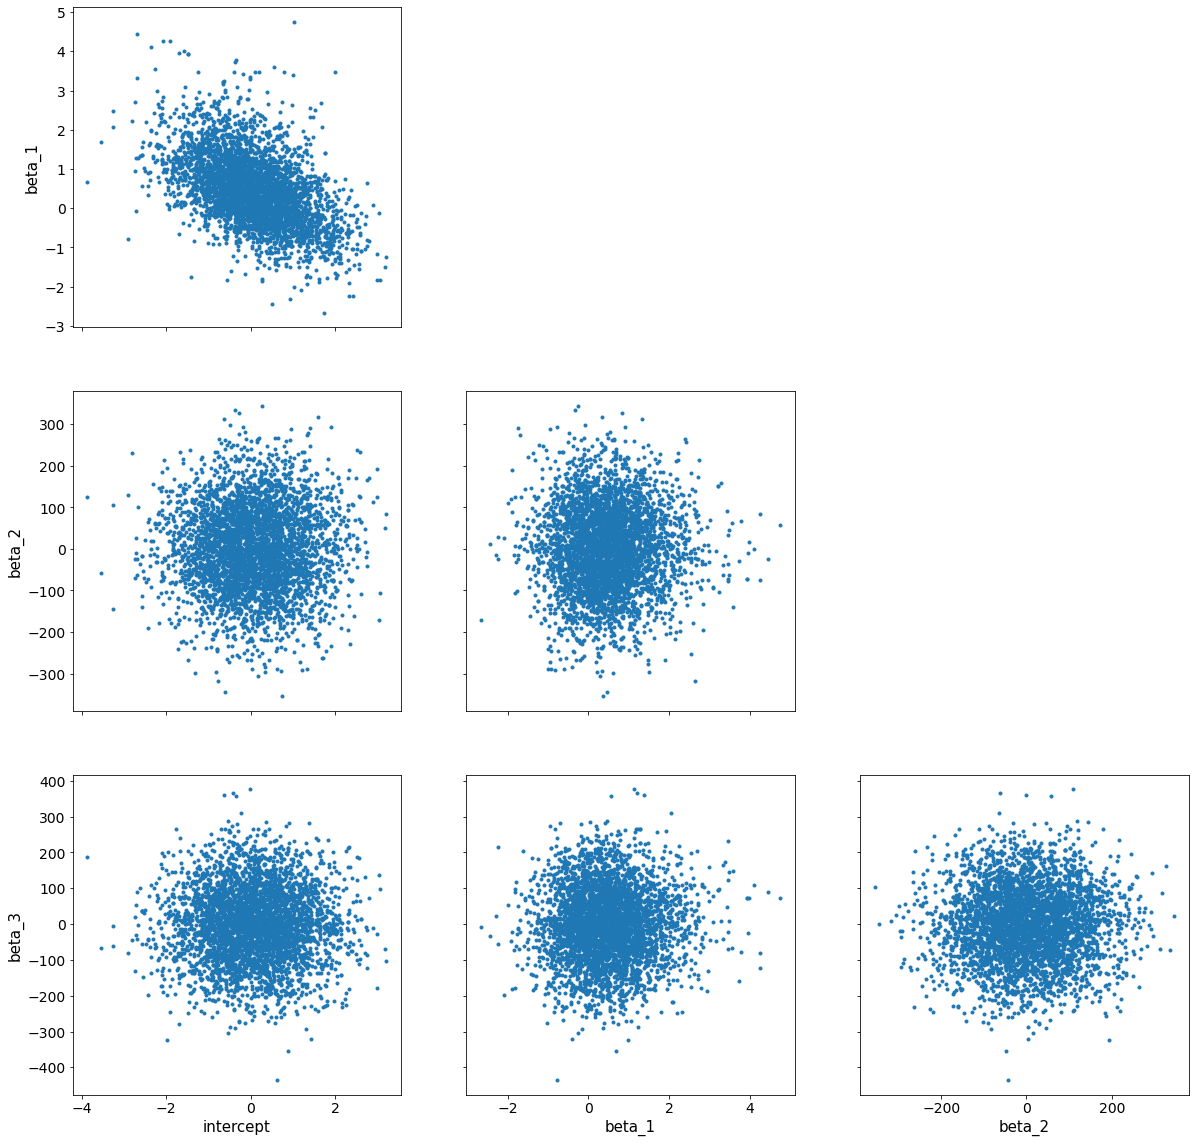

In [ ]:
import arviz as az
az.plot_pair(trace, figsize=(20, 20));

## Exploring The Logistic Curve <a class="anchor" id="exploring-logistic-curve"></a>

Okay, so we want to build a logistic regression model from first principles. Let's start by exploring the logistic curve. Here is the definition in LaTeX. We want to make this mathematical definition into a Python function we can execute.

In [ ]:
render(r"""$$
\sigma(x) = \frac{1}{1 + \exp{-x}}
$$""")

<IPython.core.display.Math object>

In [ ]:
import math

def sigmoid(x):
  """
  Logistic sigmoid function
  of a single real variable.
  """
  return 1 / (1 + math.exp(-x))

## Evaluating a function in Python this is a number between 0 and 1 

In [ ]:
sigmoid(5.0)

0.9933071490757153

## Anothing property is sigmoid(0) = 1/2 which makes intuitive sense.

In [ ]:
sigmoid(0)

0.5

## Notice, the asymptotic behaviour of logistic curve by plotting it.

In [ ]:
# Relu step function

In [ ]:
def relu(x):
  """
  Mathematical RELU function
  """
  return max(0, x)

# Vectorizing Python Code for Optimization 

In [ ]:
import numpy as np

vectorized_sigmoid = np.vectorize(sigmoid)

x = np.arange(-10, 10)
y = vectorized_sigmoid(x)

## Plotting Sigmoid 

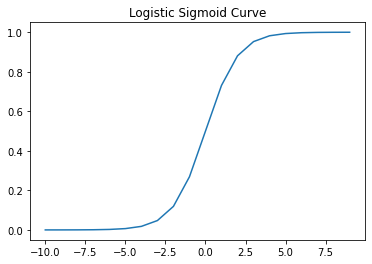

In [ ]:
%matplotlib inline

plt.plot(x, y)
plt.title("Logistic Sigmoid Curve")
plt.show()

# X here will be called the design matrix. It is an n x p matrix where n is number of observations and p is the number of features. Here p >= 1 and n >= 1.

In [ ]:
n = 20
p = 5

X = np.arange(100).reshape(n, p)
w = np.arange(p)
b = np.arange(n)
np.matmul(X, w) + b

array([ 30,  81, 132, 183, 234, 285, 336, 387, 438, 489, 540, 591, 642,
       693, 744, 795, 846, 897, 948, 999])

## A linear hypothesis looks like:

y_hat = wx + b 

## We can translate this into a Python function:

In [ ]:
# Hypothesis for Linear Regression

def linear_model(x, w, b):
  """
  Hypothesis for a linear
  model
  """
  y_hat = np.dot(X, w) + b 
  return y_hat


linear_model(X, w, b)

array([ 30,  81, 132, 183, 234, 285, 336, 387, 438, 489, 540, 591, 642,
       693, 744, 795, 846, 897, 948, 999])

## The only difference between our linera hypothesis and logistic hypothesis is the logistic curve.

In [ ]:
def logistic_model(x, W, b):
  """
  Hypothesis for 
  logistic regression model
  """
  y_hat = vectorized_sigmoid(np.matmul(X, w) + b)
  return y_hat 

y_hat = logistic_model(X, w, b)
y = np.ones(n)


### First, we need to define log loss. We are solving a classificaiton prolem so unlike a linear regression model which would use Mean Squared Error (MSE) or Mean Absolute Error (MAE), we use a binary cross entropy function. The inputs are the actuals and predictions, y and y_hat.

In [ ]:
def log_loss(y_hat, y):
  """
  We need a log loss function.
  """
  p = y_hat
  q = 1 - y_hat
  log_p = np.log(p) 
  log_q = np.log(q)
  return -np.mean(np.dot(log_p, p) - np.dot(log_q, q))

log_loss(y_hat, y)

<ipython-input-67-ac5f6d7013b3>:8: RuntimeWarning: divide by zero encountered in log
  log_q = np.log(q)


nan

### Unfortunately there is a bug in our code. Can you spot the bug and fix it?

In [ ]:
from scipy.special import xlogy

def log_loss(y_hat, y):
  """
  Improved version of
  log loss that can handle
  small values.
  """
  return - np.mean(xlogy(y, y_hat) + xlogy(1-y, 1-y_hat))

log_loss(y_hat, y)

4.674038933672128e-15

### We get nan values when we our loss is close to zero since log(0) is not defined, it tends towards -infinity. This SciPy special function deals with this by adding a very small number epsilon to y and y_hat.

Also check edge cases!

## Next, we need to compute partial derivatives of each of the parameters of our model hypothesis. This can also be done with auto differentiation if available in your language but here we compute it manually.

In [ ]:
render(r"""
\partia lderitivie of log loss
""")

<IPython.core.display.Math object>

In [ ]:
# gradient descent 

def partial_w(X, y, y_hat):
  """
  Compute the partial derivative of
  logistic modle with respect to W 
  """
  return np.dot(X.T, y_hat -y)/len(y_hat)


In [ ]:
def partial_b(y_hat, y):
  """
  Compute the partial derivative
  of logistic function with
  respect to parameter b 
  """
  return np.sum(y_hat - y)/len(y_hat)
 



In [ ]:
# training loop

epochs = 1000
losses = []
lamda = 0.01
for epoch in range(epochs):
  # forward pass
  y_hat = logistic_model(X, w, b)
  w = w - lamda * partial_w(X, y, y_hat)
  b = b - lamda * partial_b(y, y_hat)
  # compute loss
  loss = log_loss(y_hat, y)
  losses.append(loss)
  print(loss)

4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.674038933672128e-15
4.67403893

## Finally, let's make a prediction on a new data point

In [79]:

X_new = np.arange(p)
logistic_model(X_new, w, b)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])